<a href="https://colab.research.google.com/github/pragatheesha/customer_sales_analysis/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Data

import pandas as pd

df_sales = pd.read_csv("/content/sales_data.csv")
df_customers = pd.read_csv("/content/customer_churn.csv")

In [ ]:
# Explore Data
df_sales

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680
...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717


In [ ]:
df_customers

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0
...,...,...,...,...,...,...,...,...,...
495,C00496,50,128,6970,Month-to-month,Credit Card,Yes,1,0
496,C00497,2,49,5917,Two year,Bank Transfer,No,1,0
497,C00498,46,198,2158,Month-to-month,Bank Transfer,No,0,0
498,C00499,1,185,5755,Two year,Credit Card,Yes,1,1


In [ ]:
print(df_sales.head())

         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680


In [ ]:
print(df_customers.head())

  CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
0     C00001       6              64          1540        One year   
1     C00002      21             113          1753  Month-to-month   
2     C00003      27              31          1455        Two year   
3     C00004      53              29          7150  Month-to-month   
4     C00005      16             185          1023        One year   

      PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
0       Credit Card               No              1      0  
1  Electronic Check              Yes              1      0  
2       Credit Card               No              1      0  
3  Electronic Check               No              1      0  
4  Electronic Check               No              1      0  


In [ ]:
# Handle Dates & Extract Month

df_sales["OrderDate"] = pd.to_datetime(df_sales["Date"])
df_sales["Month"] = df_sales["OrderDate"].dt.month
df_sales["Year"] = df_sales["OrderDate"].dt.year

In [ ]:
df_sales["OrderDate"]

,OrderDate
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
95,2024-04-05
96,2024-04-06
97,2024-04-07
98,2024-04-08


In [ ]:
df_sales["Month"]

,Month
0,1
1,1
2,1
3,1
4,1
...,...
95,4
96,4
97,4
98,4


In [ ]:
df_sales["Year"]

,Year
0,2024
1,2024
2,2024
3,2024
4,2024
...,...
95,2024
96,2024
97,2024
98,2024


In [ ]:
# Monthly Sales Analysis

df_monthly_sales = df_sales.groupby("Month")["Total_Sales"].sum()
df_monthly_sales


,Total_Sales
Month,
1,4120524
2,2656050
3,4485006
4,1103468


In [ ]:
# Filter Data Using Multiple Conditions

df_high_value_sales = df_sales[
    (df_sales["Total_Sales"] > 10000) & (df_sales["Region"] == "North")
]
df_high_value_sales

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,OrderDate,Month,Year
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024-01-02,1,2024
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024-01-05,1,2024
8,2024-01-09,Tablet,3,32791,CUST009,North,98373,2024-01-09,1,2024
17,2024-01-18,Tablet,4,19322,CUST018,North,77288,2024-01-18,1,2024
19,2024-01-20,Laptop,8,41749,CUST020,North,333992,2024-01-20,1,2024
22,2024-01-23,Laptop,9,29275,CUST023,North,263475,2024-01-23,1,2024
25,2024-01-26,Laptop,3,25948,CUST026,North,77844,2024-01-26,1,2024
26,2024-01-27,Tablet,1,38298,CUST027,North,38298,2024-01-27,1,2024
27,2024-01-28,Tablet,7,43495,CUST028,North,304465,2024-01-28,1,2024
28,2024-01-29,Headphones,1,45467,CUST029,North,45467,2024-01-29,1,2024


In [48]:
# Merge Customer & Sales Data

# Align Customer IDs for merging

df_sales['Customer_ID'] = 'C' + df_sales['Customer_ID'].str.extract(r'(\d+)')[0].astype(int).astype(str).str.zfill(5)

merged_df = pd.merge(df_sales, df_customers, left_on="Customer_ID", right_on="CustomerID", how="inner")
merged_df

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,OrderDate,Month,Year,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,2024-01-01,Phone,7,37300,C00001,East,261100,2024-01-01,1,2024,C00001,6,64,1540,One year,Credit Card,No,1,0
1,2024-01-02,Headphones,4,15406,C00002,North,61624,2024-01-02,1,2024,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,2024-01-03,Phone,2,21746,C00003,West,43492,2024-01-03,1,2024,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,2024-01-04,Headphones,1,30895,C00004,East,30895,2024-01-04,1,2024,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,2024-01-05,Laptop,8,39835,C00005,North,318680,2024-01-05,1,2024,C00005,16,185,1023,One year,Electronic Check,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,C00096,North,166160,2024-04-05,4,2024,C00096,20,150,1780,Month-to-month,Electronic Check,Yes,0,0
96,2024-04-06,Headphones,1,7647,C00097,West,7647,2024-04-06,4,2024,C00097,15,40,510,Month-to-month,Bank Transfer,No,0,0
97,2024-04-07,Tablet,5,27196,C00098,East,135980,2024-04-07,4,2024,C00098,42,172,1168,Month-to-month,Bank Transfer,No,1,0
98,2024-04-08,Monitor,1,30717,C00099,North,30717,2024-04-08,4,2024,C00099,10,143,3353,Two year,Electronic Check,No,1,1


In [51]:
# Identify Top Customers

top_customers_df = merged_df.groupby("CustomerID")["Total_Sales"].sum().sort_values(ascending=False)
top_customers_df

,Total_Sales
CustomerID,
C00016,373932
C00007,363870
C00083,350888
C00073,349510
C00020,333992
...,...
C00058,10544
C00097,7647
C00091,7148


In [53]:
# Pivot Table (Summarization)

pivot_table = pd.pivot_table(
    merged_df,
    values="Total_Sales",
    index="Region",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)
pivot_table

Product,Headphones,Laptop,Monitor,Phone,Tablet
Region,,,,,
East,288361,221946,642870,506828,859634
North,107091,1798206,397100,489284,1191954
South,512168,1373120,39924,1471428,341212
West,476413,495938,268177,391854,491540


In [62]:
# METRICS CALCULATION

# Total Revenue
total_revenue = merged_df["Total_Sales"].sum()

# Total Customers
total_customers = merged_df["CustomerID"].nunique()

# Average Order Value (assuming each row is a distinct sale)
average_order_value = merged_df["Total_Sales"].mean()

# Top Customer
customer_sales = merged_df.groupby("CustomerID")["Total_Sales"].sum()
top_customer = customer_sales.idxmax()
top_customer_sales = customer_sales.max()

# PRINT FORMATTED REPORT
print("\nCUSTOMER SALES ANALYSIS REPORT\n")
print(f"Total Revenue: ${total_revenue:,.0f}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Order Value: ${average_order_value:,.0f}")
print(f"Top Customer: {top_customer} - ${top_customer_sales:,.0f}")


CUSTOMER SALES ANALYSIS REPORT

Total Revenue: $12,365,048
Total Customers: 100
Average Order Value: $123,650
Top Customer: C00016 - $373,932


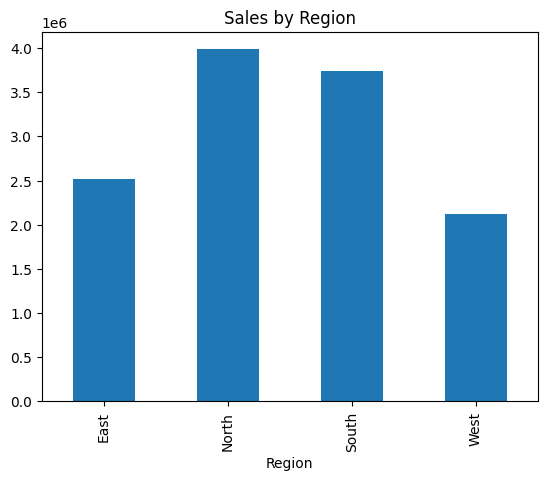

In [58]:
# Visualizations

import matplotlib.pyplot as plt

# Sales by Region
merged_df.groupby("Region")["Total_Sales"].sum().plot(kind="bar", title="Sales by Region")
plt.show()

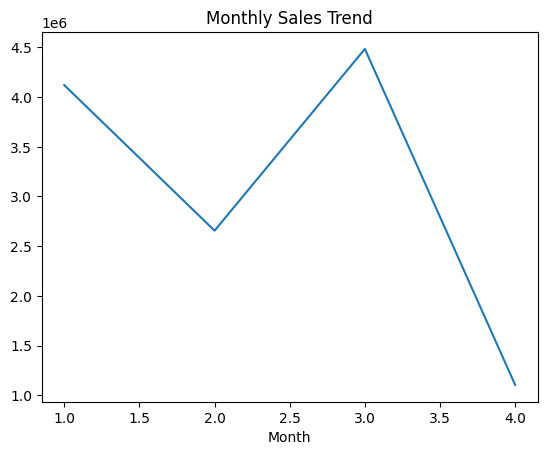

In [57]:
# Monthly Sales Trend
df_monthly_sales.plot(kind="line", title="Monthly Sales Trend")
plt.show()